# Extra exercise:

To help understand and explore new concepts, you can simulate fake
datasets in Python. The advantage of this is that you “play God” because you
actually know the underlying truth, and you get to see how good your
model is at recovering the truth.

Once you’ve better understood what’s going on with your fake dataset,
you can then transfer your understanding to a real one. We’ll show
you how to simulate a fake dataset here, then we’ll give you some ideas
for how to explore it further:

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import statsmodels.api as sm
%matplotlib inline
from sklearn import linear_model, metrics, cross_validation

In [52]:
# Simulating fake data
# from a normal distribution simulate
# 1000 values with a mean of 5 and
# standard deviation of 7
# https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.norm.html
x_1 = scs.norm.rvs(loc=5, scale=np.sqrt(10), size=1000, random_state=None)

In [53]:
true_error = scs.norm.rvs(loc=0, scale=np.sqrt(50), size=1000, random_state=None)

In [54]:
true_beta_0 = 10.1
true_beta_1 = -8.2

In [55]:
y = true_beta_0 + true_beta_1*x_1 + true_error

(array([   7.,   12.,   48.,  120.,  211.,  230.,  187.,  115.,   46.,   24.]),
 array([-118.4170616 , -102.4374442 ,  -86.4578268 ,  -70.4782094 ,
         -54.498592  ,  -38.51897461,  -22.53935721,   -6.55973981,
           9.41987759,   25.39949499,   41.37911239]),
 <a list of 10 Patch objects>)

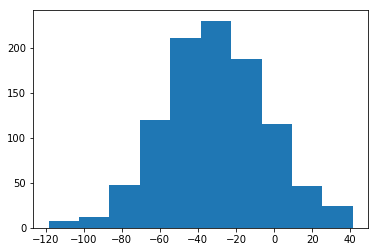

In [56]:
plt.hist(y)

In [57]:
x_1 = sm.add_constant(x_1)
model = sm.OLS(y,x_1)
results = model.fit()

In [58]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 1.326e+04
Date:                Wed, 19 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:32:36   Log-Likelihood:                -3386.4
No. Observations:                1000   AIC:                             6777.
Df Residuals:                     998   BIC:                             6787.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0446      0.428     25.811      0.000      10.205      11.884
x1            -8.3503      0.073   -115.140      0.000      -8.493      -8.208
==============================================================================
Omnibus:                        0.664   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.539
Skew:                           0.032   Prob(JB):                        0.764
Kurtosis:                       3.094   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
## This is the graph of the y we want to predict:

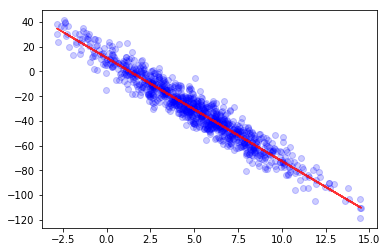

In [60]:
plt.scatter(x_1.T[1], y, c='b', alpha=0.2)
plt.plot(x_1.T[1], results.predict(), c='r', alpha=0.8)
plt.show()

**1.** Build a regression model and see that it recovers the true values of the βs.

In [12]:
x_1 = sm.add_constant(x_1)
model = sm.OLS(y,x_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 1.223e+04
Date:                Wed, 19 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:13:08   Log-Likelihood:                -3406.9
No. Observations:                1000   AIC:                             6818.
Df Residuals:                     998   BIC:                             6828.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2308      0.438     23.384      0.000       9.372      11.089
x1            -8.1874      0.074   -110.594      0.000      -8.333      -8.042
==============================================================================
Omnibus:                        0.835   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.659   Jarque-Bera (JB):                0.849
Skew:                           0.070   Prob(JB):                        0.654
Kurtosis:                       2.975   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**2.** Simulate another fake variable x_2 that has a normal distribution with different parameters than x_1 that you pick. Now make the truth be that y is a linear combination of both x_1 and x_2. Fit a model that uses both.

In [114]:
# this is the new y you want to predict:
true_beta_0 = 10.1
true_beta_1 = -8.2
true_beta_2 = 5.6
x_2 = scs.norm.rvs(loc=3, scale=np.sqrt(15), size=1000, random_state=None)
x_2 = np.column_stack((x_1,x_2))
x_2.reshape(1000,3)
x_2 = x_2[:,1:]

In [112]:
y = true_beta_0 + true_beta_1 + true_beta_2 * x_2

In [116]:
x_1 = x_1[:,1:]
x_1.reshape(1000,2)
x_2.reshape(1000,2)

In [119]:
model = sm.OLS(y, x_1)
results = model.fit()
results.summary()

ValueError: shapes (1000,2) and (1000,2) not aligned: 2 (dim 1) != 1000 (dim 0)

**3.** Create 3 (linear regression, Lasso & Ridge) cross validations with 5 folds, and calculate the MSE & R2

In [126]:
modeldata = linear_model.LinearRegression().fit(x_2,y)
print metrics.mean_squared_error(y, lm.predict(x_2)) #calculate mean squared error straight away from dat

kf = cross_validation.KFold(len(y), n_folds=5, shuffle=True)


276.126813855


In [127]:
mse_values = []
scores = []
n= 0
print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    scores.append(lm.score(modeldata, y))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)

~~~~ CROSS VALIDATION each fold ~~~~


AttributeError: 'LinearRegression' object has no attribute 'iloc'

**4.** Do 2 grid searches to find out the optimal alpha for Lasso and Ridge. Again calculate the MSE and R2

In [120]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='mean_squared_error')

gs.fit(modeldata, y)

/Users/patrickrhbrown/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/patrickrhbrown/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


NameError: name 'modeldata' is not defined